# Quais dos planos pré-pagos dão mais receita?

Você trabalha como analista para a empresa de telecomunicações Megaline. TA empresa oferece aos seus cliente planos pré-pagos, Surf e Ultimate. O departamento comercial quer saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.
Você vai realizar uma primeira análise dos planos baseados em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. O seu trabalho é analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

Obs: A Megaline arredonda segundos para minutos, e megabytes para gigabytes. Para chamadas, cada chamada individual é arredondada para cima: mesmo se uma chamada tenha durado apenas um segundo, será contado como um minuto. Para trafego de web, sessões individuais de web não são arredondadas para cima. Ao invés disso, o total do mês é arredondado para cima. Se alguém usar 1025 megabytes esse mês, eles serão cobrados por 2 gigabytes.

## Inicialização

**Bibliotecas usadas no projeto.**

In [1]:
# Para manipulação dos dados
import pandas as pd 
# Para estatisticas 
from scipy import stats as st 
# Para gráficos
import matplotlib.pyplot as plt 
# Para operações matemáticas
import numpy as np 

## Carregando os dados

**Leitura dos arquivos que serão utilizados.**

In [2]:
try:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')
except:
    calls = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    messages = pd.read_csv('megaline_messages.csv')
    plans = pd.read_csv('megaline_plans.csv')
    users = pd.read_csv('megaline_users.csv')

## Visualização dos dados

**Uma olhada nas informações gerais.**

### A tabela `calls` (dados sobre as chamadas)
- `id` — identificador de chamada unívoco
- `call_date` — data da chamada
- `duration` — duração da chamada (em minutos)
- `user_id` — o identificador do usuário que faz a chamada

In [3]:
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [4]:
calls.tail(10)

,id,user_id,call_date,duration
137725,1499_194,1499,2018-10-31,0.00
137726,1499_195,1499,2018-09-16,1.39
137727,1499_196,1499,2018-11-22,0.27
137728,1499_197,1499,2018-12-27,8.36
137729,1499_198,1499,2018-10-26,6.41
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [7]:
calls.duplicated().sum()

0

#### Conclusão calls

**Os dados parecem estar sólidos, mas existe algo que deve ser corrigido:**
- Criar função para modificar a coluna `call_date` para datetime.
- A coluna da duração chamada `duration` deve ser arredondada para cima.

### A tabela `internet` (dados sobre sessões web):
- `id` — identificador de sessão unívoco
- `mb_used` — o volume de dados gasto durante a sessão ( em megabytes)
- `session_date` — data da sessão web
- `user_id` — identificador do usuário

In [8]:
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [9]:
internet.tail(10)

,id,user_id,session_date,mb_used
104815,1499_210,1499,2018-11-30,191.92
104816,1499_211,1499,2018-09-26,0.00
104817,1499_212,1499,2018-09-11,0.00
104818,1499_213,1499,2018-10-15,430.27
104819,1499_214,1499,2018-10-18,261.13
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [11]:
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [12]:
internet.duplicated().sum()

0

#### Conclusão internet

**Os dados parecem estar sólidos, mas existe algo que deve ser corrigido:**
- Criar função para modificar a coluna `session_date` para datetime.
- Converter a coluna `mb_used`para gigabytes, arredondando para cima!

### A tabela `messages` (dados nas mensagens de texto):
- `id` — identificador unívoco de mensagem de textos
- `message_date` — data da mensagem de texto
- `user_id` — o identificador do usuário que envia a mensagem de texto

In [13]:
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [14]:
messages.tail(10)

,id,user_id,message_date
76041,1497_502,1497,2018-12-30
76042,1497_503,1497,2018-12-29
76043,1497_507,1497,2018-12-23
76044,1497_517,1497,2018-12-17
76045,1497_524,1497,2018-12-12
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23


In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [17]:
messages.duplicated().sum()

0

#### Conclusão messages

**Os dados parecem estar sólidos, mas existe algo que deve ser corrigido:**
- Criar função para modificar a coluna `message_date` para datetime.

### A tabela `plans` (dados sobre os planos):
- `plan_name` — o nome do plano de chamadas
- `usd_monthly_pay` — preço mensal em dólares dos EUA
- `minutes_included` — pacote de minutos mensal
- `messages_included` — pacote de mensagens de texto mensal
- `mb_per_month_included` — pacote de volume de dados (em megabytes)
- `usd_per_minute` — preço por minuto depois de exceder o limite do pacote (por exemplo, se o pacote inclui 100 - minutos, o primeiro minuto excedente será cobrado)
- `usd_per_message` — preço por mensagem de texto depois de exceder o limite do pacote
- `usd_per_gb` — preço por gigabyte extra de dados após exceder o limite do pacote (1 GB = 1024 megabytes)

In [18]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [19]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [20]:
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [21]:
plans.duplicated().sum()

0

#### Conclusão plans

**Os dados parecem estar sólidos, mas existe algo que deve ser corrigido:**
- Converter a coluna `mb_per_month_included`para gigabytes.

### A tabela `users` (dados sobre usuários):
- `user_id` — identificação do usuário
- `first_name` — nome do usuário
- `last_name` — último sobrenome do usuário
- `age` — idade do usuário (em anos)
- `reg_date` — data da inscrição (dd, mm, aa)
- `churn_date` — a data que o usuário parou de usar o serviço (se o valor for ausente, o plano estava sendo usado quando esse dado foi gerado)
- `city` — cidade de residência do usuário
- `plan` — nome do plano

In [22]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [23]:
users.tail(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
490,1490,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN
491,1491,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18
492,1492,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaN
493,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [25]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [26]:
users.duplicated().sum()

0

#### Conclusão users

- Criar função para modificar a coluna `reg_date` para datetime.
- Criar função para modificar a coluna `churn_date` para datetime.

### Conclusão Geral

**Existem erros nos dados que devem ser corrigidos são eles:**
- Conversão de tipo de dados
- Conversão de valores em megabytes para gigabytes

## Preparando os dados PT1

**Oque deve ser resolvido e adicionado:**

**Tabela `calls`**

- Criar função para modificar a coluna `call_date` para datetime.
- A coluna da duração chamada `duration` deve ser arredondada para cima.
- Criar coluna do mês das chamadas realizadas.

**Tabela `internet`**
- Criar função para modificar a coluna `session_date` para datetime.
- Converter a coluna `mb_used`para gigabytes, arredondando para cima!
- Criar coluna do mês das internet utilizada.

**Tabela `messages`**
- Criar função para modificar a coluna `message_date` para datetime.
- Criar coluna do mês das mensagens realizadas.

**Tabela `plans`**
- Converter a coluna `mb_per_month_included`para gigabytes.

**Tabela `users`**
- Criar função para modificar a coluna `reg_date` para datetime.
- Criar função para modificar a coluna `churn_date` para datetime.


### Tabela `calls`

In [27]:
# Mudando o formato da coluna 'call_date' para datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# Arredondando valores da coluna 'call_date' para cima e transformando ela no tipo int para não ficar .0
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

# Criando uma coluna do mês das chamadas realizadas
calls['month'] = calls['call_date'].dt.month_name()

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int32         
 4   month      137735 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 4.7+ MB


### Tabela `internet`

In [28]:
# Mudando o formato da coluna 'session_date' para datetime
internet['session_date'] = pd.to_datetime(internet['session_date'],
                                          format='%Y-%m-%d')

# Convertendo coluna 'mb_used' para gigabytes
internet['mb_used'] = internet['mb_used'] / 1024

# Arredondando valores da coluna 'mb_used' para cima e convertendo para o tipo int
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

# Renomeando a coluna
internet = internet.rename(columns={'mb_used': 'gb_used'})

# Criando coluna mês
internet['month'] = internet['session_date'].dt.month_name()

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   gb_used       104825 non-null  int32         
 4   month         104825 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 3.6+ MB


### Tabela `messages`

In [29]:
# Mudando o formato da coluna 'message_date' para datetime
messages['message_date'] = pd.to_datetime(messages['message_date'],
                                          format='%Y-%m-%d')

# Criando uma coluna do mês das mensagens realizadas
messages['month'] = messages['message_date'].dt.month_name()

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


### Tabela `plans`

In [30]:
# Convertendo valores da coluna para 'mb_per_month_included' gigabytes
plans['mb_per_month_included'] = plans['mb_per_month_included'] / 1024

# Renomeando a coluna 'mb_per_month_included' para 'gb_per_month_included'
plans = plans.rename(
    columns={'mb_per_month_included': 'gb_per_month_included'})

# Convertendo coluna 'gb_per_month_included' para o tipo int
plans['gb_per_month_included'] = plans['gb_per_month_included'].astype('int')

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      int32  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 248.0+ bytes


### Tabela `users`

In [31]:
# Mudando o formato da coluna 'reg_date' para datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# Mudando o formato da coluna 'churn_date' para datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Preparando os dados PT2

**Para cada usuário, encontre:**
- O número de chamadas feitas e o número de minutos usados por mês.
- O número de mensagens de texto enviadas por mês.
- O volume de dados por mês.
- A receita mensal para cada usuário (subtraia o limite do pacote grátis do número total de chamadas, mensagens de texto, e dados; multiplique o resultado pelos valores do plano; adicione o preço mensal dependendo do plano de chamada).

### O número de chamadas feitas e o número de minutos usados por mês.

In [32]:
# Criando pivot_table para pegar o número de chamadas por mês
n_calls = calls.pivot_table(index=['user_id', 'month'],
                            values='id',
                            aggfunc='count').reset_index()

# Renomeando coluna 'id' para 'calls_used_per_month'
n_calls = n_calls.rename(columns={'id': 'calls_used_per_month'})

# Criando pivot_table para pegar o número de minutos por mês
n_minutes = calls.pivot_table(index=['user_id', 'month'],
                              values='duration',
                              aggfunc='sum').reset_index()

# Renomeando coluna 'duration' para 'minutes_used_per_month'
n_mininutes = n_minutes.rename(columns={'duration': 'minutes_used_per_month'})

# Juntando os dataframes
calls_minutes = n_mininutes.merge(n_calls)

calls_minutes.head()

,user_id,month,minutes_used_per_month,calls_used_per_month
0,1000,December,124,16
1,1001,August,182,27
2,1001,December,412,56
3,1001,November,426,64
4,1001,October,393,65


### O número de mensagens de texto enviadas por mês.

In [33]:
# Criando pivot_table para pegar o número de menssagens por mês
n_menssages = messages.pivot_table(index=['user_id', 'month'],
                                   values='id',
                                   aggfunc='count').reset_index()

# Renomeando o nome da coluna 'id' para 'menssages_used_per_month'
n_menssages = n_menssages.rename(columns={'id': 'menssages_used_per_month'})

n_menssages.head()

,user_id,month,menssages_used_per_month
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53


### O volume de dados por mês.

In [34]:
# Criando pivot_table para pegar o número de dados por mês
vm_data = internet.pivot_table(index=['user_id', 'month'],
                               values='gb_used',
                               aggfunc='sum').reset_index()

# Renomeando o nome da coluna 'gb_used' para 'gb_used_per_month'
vmdata = vm_data.rename(columns={'gb_used': 'gb_used_per_month'})

vmdata.head()

,user_id,month,gb_used_per_month
0,1000,December,4
1,1001,August,21
2,1001,December,55
3,1001,November,49
4,1001,October,50


### A receita mensal para cada usuário (subtraia o limite do pacote grátis do número total de chamadas, mensagens de texto, e dados; multiplique o resultado pelos valores do plano; adicione o preço mensal dependendo do plano de chamada).

In [35]:
# Juntado os dataframes
revenue_month = calls_minutes.merge(n_menssages)
revenue_month = revenue_month.merge(vmdata)
revenue_month = revenue_month.merge(users, on='user_id')

# Apagando as colunas que não são desejaveis
revenue_month.drop(
    ['first_name', 'last_name', 'age', 'reg_date', 'churn_date'],
    axis=1,
    inplace=True)


# Função para calcular diferença entre minutos usados e limite do plano
def calc_minutes(row):

    # Declarando variavel para salvarmos a diferença entre o valor usado e o limite
    dif_minutes = 0

    # Ver se o plano é 'surf'
    if row['plan'] == 'surf':

        # Vendo quem passou do limite do plano de minutos
        if row['minutes_used_per_month'] > 500:

            # Subtraindo o limite do pacote grátis por total usado para saber diferença
            dif_minutes = row['minutes_used_per_month'] - 500

    # Ver se o plano é 'ultimate'
    if row['plan'] == 'ultimate':

        # Vendo quem passou do limite do plano de minutos
        if row['minutes_used_per_month'] > 3000:

            # Subtraindo o limite do pacote grátis por total usado para saber diferença
            dif_minutes = row['minutes_used_per_month'] - 3000

    return dif_minutes


# Aplicando a função ao data frame e criando uma nova coluna
revenue_month['dif_minutes'] = revenue_month.apply(calc_minutes, axis=1)


# Função para calcular diferença entre mensagens usadas e limite do plano
def calc_messages(row):
    # Declarando variavel para salvarmos a diferença entre o valor usado e o limite
    dif_messages = 0

    # Ver se o plano é 'surf'
    if row['plan'] == 'surf':

        # Vendo quem passou do limite do plano de menssagens
        if row['menssages_used_per_month'] > 50:

            # Subtraindo o limite do pacote grátis por total usado para saber diferença
            dif_messages = row['menssages_used_per_month'] - 50

    # Ver se o plano é 'ultimate'
    if row['plan'] == 'ultimate':

        # Vendo quem passou do limite do plano de menssagens
        if row['menssages_used_per_month'] > 1000:

            # Subtraindo o limite do pacote grátis por total usado para saber diferença
            dif_messages = row['menssages_used_per_month'] - 1000

    return dif_messages


# Aplicando a função ao data frame e criando uma nova coluna
revenue_month['dif_messages'] = revenue_month.apply(calc_messages, axis=1)


# Função para calcular diferença entre internet usada e limite do plano
def calc_gb(row):
    # Declarando variavel para salvarmos a diferença entre o valor usado e o limite
    dif_gb = 0

    # Ver se o plano é 'surf'
    if row['plan'] == 'surf':

        # Vendo quem passou do limite do plano de minutos
        if row['gb_used_per_month'] > 15:

            # Subtraindo o limite do pacote grátis por total usado para saber diferença
            dif_gb = row['gb_used_per_month'] - 15

    # Ver se o plano é 'ultimate'
    if row['plan'] == 'ultimate':

        # Vendo quem passou do limite do plano de minutos
        if row['gb_used_per_month'] > 30:

            # Subtraindo o limite do pacote grátis por total usado para saber diferença
            dif_gb = row['gb_used_per_month'] - 30

    return dif_gb


# Aplicando a função ao data frame e criando uma nova coluna
revenue_month['dif_gb'] = revenue_month.apply(calc_gb, axis=1)


# Função para calcular receita mensal de cada usuario
def calc_revenue(row):

    # Ver se o plano é 'surf'
    if row['plan'] == 'surf':

        # calculando valores excedentes do plano mais o valor do plano
        x = ((row['dif_minutes'] * 0.03) + (row['dif_messages'] * 0.03) +
             (row['dif_gb'] * 10)) + 20

    # Vendo plano restante ou seja plano 'ultimate'
    else:

        # calculando valores excedentes do plano mais o valor do plano
        x = ((row['dif_minutes'] * 0.01) + (row['dif_messages'] * 0.01) +
             (row['dif_gb'] * 7)) + 70

    return x


# Aplicando a função ao data frame e criando uma nova coluna
revenue_month['monthly_revenue'] = revenue_month.apply(calc_revenue, axis=1)

revenue_month.head()

,user_id,month,minutes_used_per_month,calls_used_per_month,menssages_used_per_month,gb_used_per_month,city,plan,dif_minutes,dif_messages,dif_gb,monthly_revenue
0,1000,December,124,16,11,4,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,0,0,0,70.00
1,1001,August,182,27,30,21,"Seattle-Tacoma-Bellevue, WA MSA",surf,0,0,6,80.00
2,1001,December,412,56,44,55,"Seattle-Tacoma-Bellevue, WA MSA",surf,0,0,40,420.00
3,1001,November,426,64,36,49,"Seattle-Tacoma-Bellevue, WA MSA",surf,0,0,34,360.00
4,1001,October,393,65,53,50,"Seattle-Tacoma-Bellevue, WA MSA",surf,0,3,35,370.09


## Analisando os dados

**Descreva o comportamento dos clientes. Encontre os minutos, mensagens de texto e volume de dados que usuários de cada plano necessitam por mês. Calcule a média, variância e o desvio padrão. Construa histogramas. Descreva as distribuições.**

In [36]:
# Função para calcular diferença entre minutos usados e limite do plano
def calc_minutes(row):

    # Declarando variavel para salvarmos a diferença entre o valor usado e o limite
    dif_minutes = 0

    # Ver se o plano é 'surf'
    if row['plan'] == 'surf':

        # Vendo quem passou do limite do plano de minutos
        if row['minutes_used_per_month'] > 500:

            # Subtraindo o limite do pacote grátis por total usado para saber diferença
            dif_minutes = row['minutes_used_per_month'] - 500

    # Ver se o plano é 'ultimate'
    if row['plan'] == 'ultimate':

        # Vendo quem passou do limite do plano de minutos
        if row['minutes_used_per_month'] > 3000:

            # Subtraindo o limite do pacote grátis por total usado para saber diferença
            dif_minutes = row['minutes_used_per_month'] - 3000

    return dif_minutes


# Aplicando a função ao data frame e criando uma nova coluna
revenue_month['dif_minutes'] = revenue_month.apply(calc_minutes, axis=1)


# Função para calcular diferença entre mensagens usadas e limite do plano
def calc_messages(row):

    # Declarando variavel para salvarmos a diferença entre o valor usado e o limite
    dif_messages = 0

    # Ver se o plano é 'surf'
    if row['plan'] == 'surf':

        # Vendo quem passou do limite do plano de menssagens
        if row['menssages_used_per_month'] > 50:

            # Subtraindo o limite do pacote grátis por total usado para saber diferença
            dif_messages = row['menssages_used_per_month'] - 50

    # Ver se o plano é 'ultimate'
    if row['plan'] == 'ultimate':

        # Vendo quem passou do limite do plano de menssagens
        if row['menssages_used_per_month'] > 1000:

            # Subtraindo o limite do pacote grátis por total usado para saber diferença
            dif_messages = row['menssages_used_per_month'] - 1000

    return dif_messages


# Aplicando a função ao data frame e criando uma nova coluna
revenue_month['dif_messages'] = revenue_month.apply(calc_messages, axis=1)


# Função para calcular diferença entre internet usada e limite do plano
def calc_gb(row):

    # Declarando variavel para salvarmos a diferença entre o valor usado e o limite
    dif_gb = 0

    # Ver se o plano é 'surf'
    if row['plan'] == 'surf':

        # Vendo quem passou do limite do plano de minutos
        if row['gb_used_per_month'] > 15:

            # Subtraindo o limite do pacote grátis por total usado para saber diferença
            dif_gb = row['gb_used_per_month'] - 15

    # Ver se o plano é 'ultimate'
    if row['plan'] == 'ultimate':

        # Vendo quem passou do limite do plano de minutos
        if row['gb_used_per_month'] > 30:

            # Subtraindo o limite do pacote grátis por total usado para saber diferença
            dif_gb = row['gb_used_per_month'] - 30

    return dif_gb


# Aplicando a função ao data frame e criando uma nova coluna
revenue_month['dif_gb'] = revenue_month.apply(calc_gb, axis=1)


# Função para calcular receita mensal de cada usuario
def calc_revenue(row):

    # Pegando usuarios do plano 'surf'
    if row['plan'] == 'surf':

        # Calculando receita para usuarios do plano surf
        x = (row['dif_minutes'] * 0.03) + (row['dif_messages'] *
                                           0.03) + (row['dif_gb'] * 10)
    else:

        # Calculando receita para usuarios do plano ultimate
        x = (row['dif_minutes'] * 0.01) + (row['dif_messages'] *
                                           0.01) + (row['dif_gb'] * 7)
    return x


# Aplicando a função ao data frame e criando uma nova coluna
revenue_month['monthly_revenue'] = revenue_month.apply(calc_revenue, axis=1)

In [37]:
revenue_month.head()

,user_id,month,minutes_used_per_month,calls_used_per_month,menssages_used_per_month,gb_used_per_month,city,plan,dif_minutes,dif_messages,dif_gb,monthly_revenue
0,1000,December,124,16,11,4,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,0,0,0,0.00
1,1001,August,182,27,30,21,"Seattle-Tacoma-Bellevue, WA MSA",surf,0,0,6,60.00
2,1001,December,412,56,44,55,"Seattle-Tacoma-Bellevue, WA MSA",surf,0,0,40,400.00
3,1001,November,426,64,36,49,"Seattle-Tacoma-Bellevue, WA MSA",surf,0,0,34,340.00
4,1001,October,393,65,53,50,"Seattle-Tacoma-Bellevue, WA MSA",surf,0,3,35,350.09


In [38]:
# Criando dataframe para plano 'surf'
surf = revenue_month.loc[revenue_month['plan']=="surf"]

# Criando dataframe para plano 'ultimate'
ultimate = revenue_month.loc[revenue_month['plan']=="ultimate"]

### Surf
**Encontre os minutos, mensagens de texto e volume de dados de usuários. Calcule a média, variância e o desvio padrão. Construa histogramas. Descreva as distribuições.**

#### Minutos de Surf - Mensal

In [39]:
# Encontrando variancia de minutos
np.var(surf['minutes_used_per_month'])

55274.53007397303

In [40]:
# Encontrando desvio padrão e média de minutos
surf['minutes_used_per_month'].describe()

count    1180.000000
mean      445.775424
std       235.205044
min         2.000000
25%       288.000000
50%       439.000000
75%       587.250000
max      1510.000000
Name: minutes_used_per_month, dtype: float64

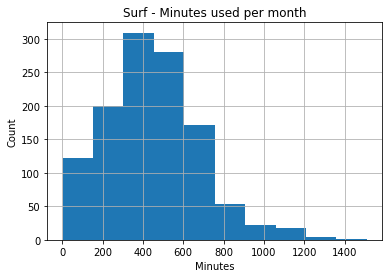

In [41]:
# Criando histograma para minutos usados
surf['minutes_used_per_month'].hist()
# Adicionando titulo ao histogrma
plt.title('Surf - Minutes used per month')
# Adicionando um rotulo no eixo y
plt.ylabel('Count')
# Adicionando um rotulo no eixo x
plt.xlabel('Minutes')
plt.show()

**Podemos observar um pico por volta dos 350 minutos a 400 minutos e uma calda a direita do histograma. Não temos uma grande diferença entre a média e a mediana oque nos leva a concluir que não possui muitos valores atipicos.**

#### Mensagens de Surf - Mensal

In [42]:
# Encontrando variancia de minutos
np.var(surf['menssages_used_per_month'])

1043.3329474288994

In [43]:
# Encontrando desvio padrão e média de minutos
surf['menssages_used_per_month'].describe()

count    1180.000000
mean       39.489831
std        32.314360
min         1.000000
25%        16.000000
50%        32.000000
75%        53.000000
max       266.000000
Name: menssages_used_per_month, dtype: float64

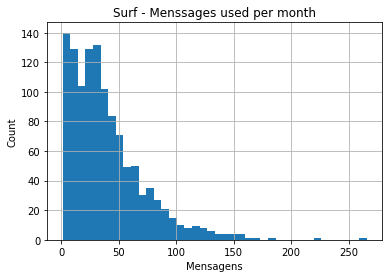

In [44]:
# Criando histograma para minutos usados
surf['menssages_used_per_month'].hist(bins = 40)
# Adicionando titulo ao histogrma
plt.title('Surf - Menssages used per month')
# Adicionando um rotulo no eixo y
plt.ylabel('Count')
# Adicionando um rotulo no eixo x
plt.xlabel('Mensagens')
plt.show()

**Podemos observar um pico por volta de 0 mensagens e 30 mensagens e uma calda a direita do histograma. E temos uma calda a direta.** 

#### Volume de dados de Surf - Mensal

In [45]:
# Encontrando variancia de minutos
np.var(surf['gb_used_per_month'])

300.98461002585566

In [46]:
# Encontrando desvio padrão e média de minutos
surf['gb_used_per_month'].describe()

count    1180.000000
mean       40.268644
std        17.356264
min         1.000000
25%        31.000000
50%        41.500000
75%        51.000000
max       132.000000
Name: gb_used_per_month, dtype: float64

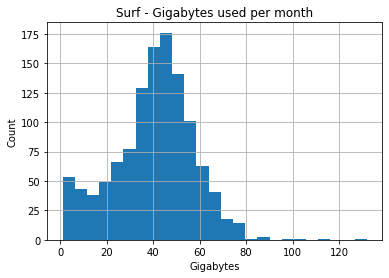

In [47]:
# Criando histograma para minutos usados
surf['gb_used_per_month'].hist(bins=25)
# Adicionando titulo ao histogrma
plt.title('Surf - Gigabytes used per month')
# Adicionando um rotulo no eixo y
plt.ylabel('Count')
# Adicionando um rotulo no eixo x
plt.xlabel('Gigabytes')
plt.show()

**Podemos observar um pico por volta de 40 gb e 40 gb. Também não temos uma grande diferença entre a média e a mediana oque nos leva a concluir que não possui muitos valores atipicos.**

### Ultimate
**Encontre os minutos, mensagens de texto e volume de dados de usuários. Calcule a média, variância e o desvio padrão. Construa histogramas. Descreva as distribuições.**

#### Minutos de Ultimate - Mensal

In [48]:
# Encontrando variancia de minutos
np.var(ultimate['minutes_used_per_month'])

62180.8197803967

In [49]:
# Encontrando desvio padrão e média de minutos
ultimate['minutes_used_per_month'].describe()

count     579.000000
mean      442.512953
std       249.576439
min         0.000000
25%       262.500000
50%       424.000000
75%       582.500000
max      1369.000000
Name: minutes_used_per_month, dtype: float64

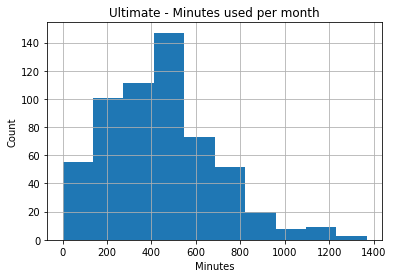

In [50]:
# Criando histograma para minutos usados
ultimate['minutes_used_per_month'].hist()
# Adicionando titulo ao histogrma
plt.title('Ultimate - Minutes used per month')
# Adicionando um rotulo no eixo y
plt.ylabel('Count')
# Adicionando um rotulo no eixo x
plt.xlabel('Minutes')
plt.show()

**Podemos observar um pico por volta dos 450 minutos e uma calda a direita do histograma. Não temos uma grande diferença entre a média e a mediana oque nos leva a concluir que não possui muitos valores atipicos.**

#### Mensagens de Ultimate - Mensal

In [51]:
# Encontrando variancia de minutos
np.var(ultimate['menssages_used_per_month'])

1082.5209446338608

In [52]:
# Encontrando desvio padrão e média de minutos
ultimate['menssages_used_per_month'].describe()

count    579.000000
mean      46.455959
std       32.930135
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: menssages_used_per_month, dtype: float64

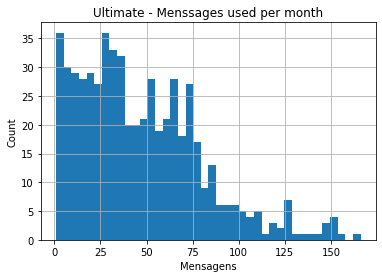

In [53]:
# Criando histograma para minutos usados
ultimate['menssages_used_per_month'].hist(bins = 40)
# Adicionando titulo ao histogrma
plt.title('Ultimate - Menssages used per month')
# Adicionando um rotulo no eixo y
plt.ylabel('Count')
# Adicionando um rotulo no eixo x
plt.xlabel('Mensagens')
plt.show()

**Podemos observar um pico por volta de 0 mensagens e 40 mensagens e uma calda a direita do histograma.** 

#### Volume de dados de Ultimate - Mensal

In [54]:
# Encontrando variancia de minutos
np.var(ultimate['gb_used_per_month'])

249.22192094642355

In [55]:
# Encontrando desvio padrão e média de minutos
ultimate['gb_used_per_month'].describe()

count    579.000000
mean      41.134715
std       15.800415
min        1.000000
25%       32.500000
50%       42.000000
75%       51.000000
max       96.000000
Name: gb_used_per_month, dtype: float64

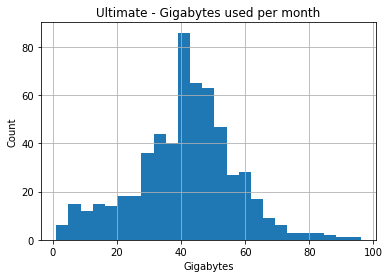

In [56]:
# Criando histograma para minutos usados
ultimate['gb_used_per_month'].hist(bins=25)
# Adicionando titulo ao histogrma
plt.title('Ultimate - Gigabytes used per month')
# Adicionando um rotulo no eixo y
plt.ylabel('Count')
# Adicionando um rotulo no eixo x
plt.xlabel('Gigabytes')
plt.show()

**Podemos observar um pico por volta de 40 gb e 50 gb. Também não temos uma grande diferença entre a média e a mediana oque nos leva a concluir que não possui muitos valores atipicos. Temos uma distribução que se asemelha a uma distribuição normal**

### Conclusão


- Temos um pouco mais de minutos utilizados pelos usuarios do plano `Surf`
- Temos um número maior de mensagens usadas pelos usuarios do plano `Ultimate`
- Já para o uso de dados temos algo muito semelhante entre os planos 

**Em resumo podemos perceber um uso semelhante entre os usuarios dos dois planos, mas temos um mais valores discrepantes no plano `Surf`**

## Testando as hipóteses

**A receita média dos usuários dos planos Ultimate e Surf são diferentes.
A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões.**

### A receita média dos usuários dos planos Ultimate e Surf são diferentes. 

- **Hipótese nula:** A receita média dos usuários dos planos são iguais.
- **Hipótese alternativa:** A receita média dos usuários dos planos são diferentes.

In [57]:
# Verificando a variancia
np.var(surf['monthly_revenue'])

25476.564128142683

In [58]:
# Verificando a variancia
np.var(ultimate['monthly_revenue'])

7147.978940523355

In [59]:
# Definiindo nível crítico de significância estatística
alpha = 0.05

# Testando a hipótese de que as médias das duas populações são diferentes
results = st.ttest_ind(surf['monthly_revenue'],ultimate['monthly_revenue'],equal_var=False)

# Imprimindo o valor-p obtido
print('p-value:',results.pvalue)

# Comparando o valor-p obtido com o nível de significância
if (results.pvalue<alpha):
    print("Nós não podemos rejeitar a hipótese nula")
else:
    print("Nós rejeitamos a hipótese nula")

p-value: 2.074816866663172e-149
Nós não podemos rejeitar a hipótese nula


#### Conclusão

**Podemos obsevar que provalvemente as receitas dos planos são diferentes.**

### A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões.

- **Hipótese nula:** A receita média dos usuários da área de NY-NJ é igual a de usuários de outras regiões.
- **Hipótese alternativa:** A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões.

In [60]:
revenue_month['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          279
Los Angeles-Long Beach-Anaheim, CA MSA             112
Chicago-Naperville-Elgin, IL-IN-WI MSA              66
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     62
Dallas-Fort Worth-Arlington, TX MSA                 56
                                                  ... 
Jacksonville, FL MSA                                 2
Dayton-Kettering, OH MSA                             2
El Paso, TX MSA                                      2
North Port-Sarasota-Bradenton, FL MSA                1
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 72, dtype: int64

In [61]:
# Filtrando coluna 'city' para achar valores que contém 'NY-NJ' e criar nova coluna chamada 'regions'
revenue_month['regions'] = revenue_month['city'].loc[revenue_month['city'].str.contains('NY-NJ')]

# Substituindo valores ausentes da coluna 'regions' para 'other'
revenue_month['regions'] = revenue_month['regions'].fillna('other')

In [62]:
# Criando dataframe para outras regiões
other = revenue_month.loc[revenue_month['regions']=='other']

# Criando dataframe para outras NY-NJ
ny_nj = revenue_month.loc[revenue_month['regions'].str.contains('NY-NJ')]

In [63]:
# Verificando a variancia
np.var(other['monthly_revenue'])

26574.59129008829

In [64]:
# Verificando a variancia
np.var(ny_nj['monthly_revenue'])

20517.949774095905

In [65]:
# Definiindo nível crítico de significância estatística
alpha = 0.05

# Testando a hipótese de que as médias das duas populações são diferentes
results = st.ttest_ind(other['monthly_revenue'],ny_nj['monthly_revenue'],equal_var=False)
                     
# Imprimindo o valor-p obtido
print('p-value:',results.pvalue)

# Comparando o valor-p obtido com o nível de significância
if (results.pvalue<alpha):
    print("Nós não podemos rejeitar a hipótese nula")
else:
    print("Nós rejeitamos a hipótese nula")

p-value: 0.06120684402322759
Nós rejeitamos a hipótese nula


#### Conclusão

**Podemos obsevar que provalvemente as receitas dos planos na região de NY-NJ como em outras regiões são iguais.**

## Conclusão Geral

Observamos que os valores médios dos dois planos tem comportamentos semelhantes, também fizemos testes de hipoteses que tiramos as conclusões que as receitas mensais dos planos provavelmente são iguais e que provavelmente a receitas mensais dos planos em NY-NJ são diferentes de outras regiões.